# The Hough Stream Spotter (HSS)
## by Sarah Pearson
Pearson et al. 2021

A walkthrough of how to run the HSS

The HSS relies on the Hough Transform (Hough 1962) to identify linear structures in discrete data sets. The Hough Transform maps from position space ($x,y$) to ($\rho,\theta$) space through the following parametirization of a straight line:

$\rho = x {\rm cos}(\theta) + y {\rm sin}(\theta)$


$\rho$ resents the minimum Euclidean distance from the origin in positional ($x,y$)-space, and $\theta$ represents the orientation of each possible line in $[0,\pi]$.
If a subset of points in ($x,y$)-space lie on a straight line, their sinusoidal curves will overlap at the  same  minimal  Euclidean  distance  from  the  origin, ρ, and at the same orientation angle, $\theta$.  Therefore, a straight line in ($x,y$) will correspond to a point in (ρ,θ) space where multiple sinusoidal curves overlap. 

We discretize the set of possible line orientations into an array $\theta_{arr}$ that  spans  0  to  180 deg  spaced  by  $\Delta \theta = 0.1\deg$. Each star thus maps to a sinusoid defined by the Hough Transform above applied to the star position ($x,y$) and  $\theta=\theta_{arr}$.  The sinusoids of the stars belonging to the stream overlap one another in the same region of (ρ,θ) space. Because a stream has a physical width, w,  theoverlap of the sinusoidal curves of its constituent stars will not be a single point in (ρ,θ).  We therefore selecta scale, ∆ρ, at which we search for linear structures. In the examples below, we use $\Delta\rho =0.4$ kpc.

Se more details in Section 3 of Pearson et al. 2021


## Imports

In [1]:
import HSS 

import numpy as np
import matplotlib.pyplot as plt
import scipy 
import astropy 

# if using masks, import regions (see README.md)

## Change the following paths to your liking:

In [2]:
# location to save plots:
path_plot = '/Users/spearson/Desktop/'

# Input for the HSS

See also Section 3.3. in Pearson et al. 2021



## Read in your data set

In [3]:
# import test data (should be circular region)
# data should be in (n,2) where n is number of stars in region 
# If data is in deg, the region will be transformed to spherical astropy.skycoordinates 

filename = 'fakestream.txt' # your data file name
fakestream = np.genfromtxt(filename) # (n,2) array 

## Update inputs 

In [7]:
#data to read in to the HSS
pos = fakestream[:,0], fakestream[:,1] # in deg here, can also be unitless
# if in deg., the data will be transformed to spherical skycoordinates
# rho (minimum Euclidian distance) will come out in units of kpc

# specify unit
unit = "deg" #unit of your input data: "deg" for observations or "unitless" for e.g., simulations  
# If unit = "unitless" the input region will not be transformed to spherical skycoordinates
# If unit = "unitless" the "mask" function cannot be used (need to set mask = False below)

# define distance to your dataset of interest
# this is only relevant if unit = "deg", otherwise set kpc_conversion = 1         
d_galaxy = 785 # [kpc] update for other galaxy than M31                                                                                                        
kpc_conversion = np.pi * d_galaxy / 180. #from deg to kpc    

#theta spacing for 2D map to (rho,theta)-space.   
delta_t = 0.1 #[deg] 

#spacing in rho (search width of interest)
drho = 0.4 #[kpc]

#threshold of statistical significance, -log10Pr(X>k)
outlier = 20 #i.e. log10Pr(X>k)< -20 in this example
# see Section 3.3 & eqaution 4 in Pearson et al. 2021

#for plots, change to your liking
pointsize = 1

#Are you removing masks from your dataset (False/True)
mask = False #
#if mask = True, load in masks_pos.txt (ra,dec) and masks_size.txt (e.g., 5 x scalelength) in deg

#read out plots and updates in run  (False/True)
verbose= True

#Search only central parts (rho_edge = True) or all parts (rho_edge = False) of input region
#set to False if not using overlapping regions, see section 3.3 in Pearson et al. 2021
#If rho_edge = True -> the HSS only search 60% central parts of the 2D (rho,theta)-histogram
rho_edge = False 



## Plot your HSS input data as sanity check

If unit="deg", this input data should be in degree for code to work and drho is in kpc

If unit="unitless", the input data can be in any unit and drho will be in this same unit.

This stream is a $10 {\rm M}_{\rm Pal 5}$-like stream injected at an angle of $\approx 73\deg$. 
The stream has 130 stars and the field has 879 stars.

Text(0, 0.5, 'deg')

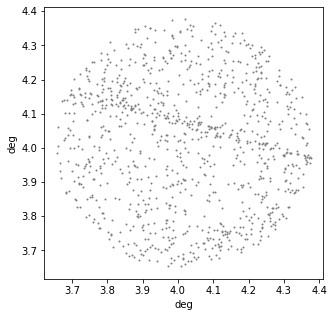

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(pos[0], pos[1], s= pointsize, color='grey') #deg
plt.xlabel(unit)
plt.ylabel(unit)

## Run HSS

We will now run the HSS, to see if the code identifies a linear structure in the input data


-------------------------------

Stream detected at an angle of:
theta_peak = [73.5][deg]

Stream detected at a minimum Euclidian distance of:
rho_peak = [0.79]

Stream detected at a significance of:
-(logPr(X>=k)) = [78.15]

-------------------------------

plots saved in /Users/spearson/Desktop/


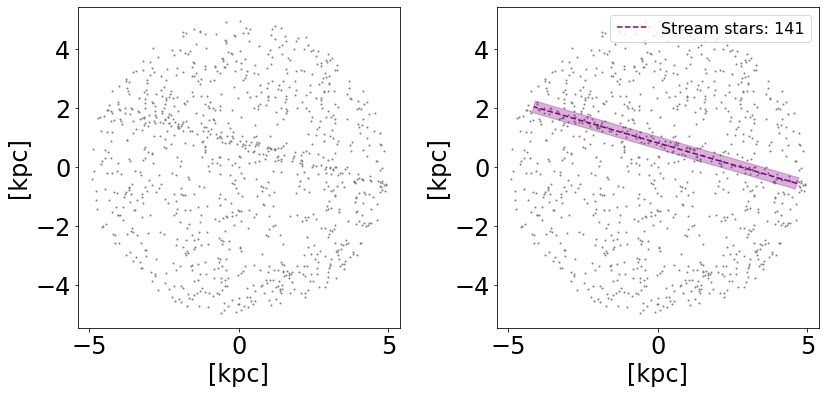

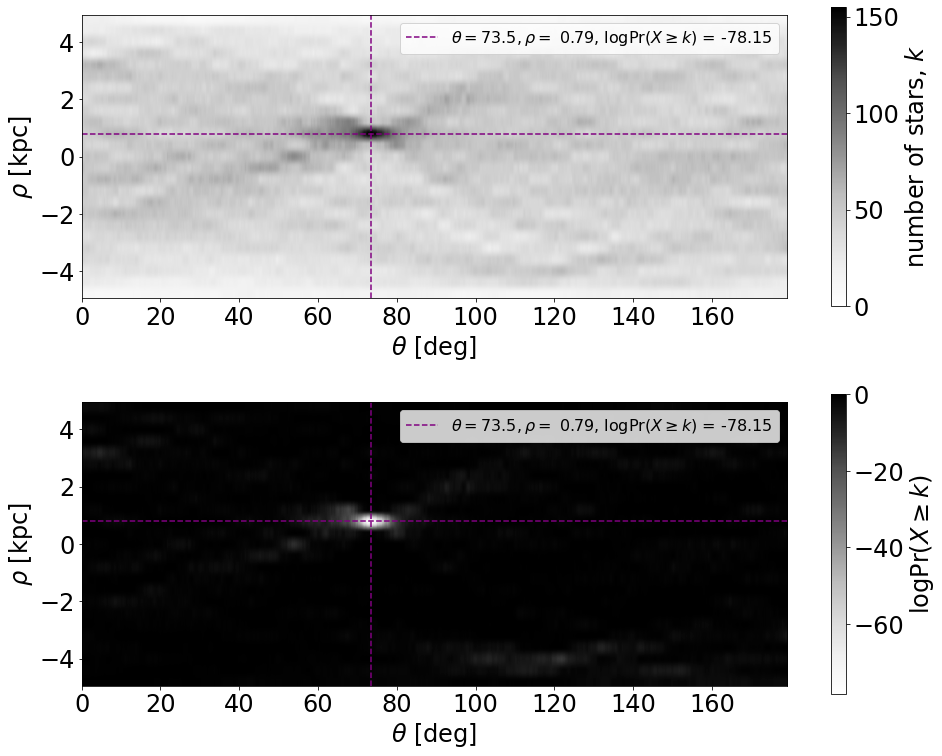

In [9]:
HSS.RT_plot(pos, unit, kpc_conversion, delta_t, drho, outlier, pointsize, mask, filename[:-4], path_plot, verbose, rho_edge)



## Summary

The HSS run above located the stream with 141 stars at:

$\theta = 73.5 \deg$, at $\rho = 0.79$ kpc 

with a significance of ${\rm log}_{10}{\rm Pr}$ = $-78.15$. 

The reason we found 141 stars (and not the injected 130) is because some of the background stars fall within the pruple `stripe'.

# New input data with three streams

This data is initially in kpc, but we convert to deg before running the HSS

In [ ]:
#import test data (should be circular region)
filename_threestreams = 'three_fakestreams.txt' #your data file name, in kpc in this example
fakestream = np.genfromtxt(filename_threestreams).T # (n,2) array n is number of stars in region 

In [ ]:
pos_threestreams = fakestream[:,0]/kpc_conversion, fakestream[:,1]/kpc_conversion # in deg


## Plot your new input data with three streams as sanity check

Here the one stream at $\approx 73$ has more stars than the other two streams, which are also at a different angle

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(pos_threestreams[0], pos_threestreams[1], s= pointsize, color='grey') #deg
plt.xlabel(unit)
plt.ylabel(unit)

## Run HSS

In [ ]:
HSS.RT_plot(pos_threestreams, unit, kpc_conversion, delta_t, drho, outlier, pointsize, mask, filename[:-4], path_plot, verbose, rho_edge)

## Summary

The HSS run above located the 3 stream with 151, 124 and 105 stars at:

$\theta = 73.6$, $14.4$, and $14.8\deg$ , at $\rho = 0.8, 0.8, 2.8$ kpc 

with a significance of ${\rm log}_{10}{\rm Pr}$ = $-69.15$, $-34.72$, $-32.25$. 
